In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("QueryResults.csv", names=["Date","TAG","POST"],header=0)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.count()

In [ ]:
df["POST"].idxmax()

In [ ]:
df.loc[1958]

In [ ]:
df.groupby("TAG").sum().sort_values("POST")

<ipython-input-105-b63b694f0590>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum().sort_values("POST")


,POST
TAG,
assembly,34852
delphi,46212
go,47499
perl,65286
ruby,214582
swift,273055
c,336042
r,356799
c++,684210


In [ ]:
df.groupby("TAG").count()

In [ ]:
df.Date=pd.to_datetime(df.Date)
df.head()

In [ ]:
new=df.pivot(index="Date",columns="TAG",values="POST").fillna(0)
new.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [ ]:
plt.plot(new.index, new.java)

<Figure size 1600x1000 with 0 Axes>

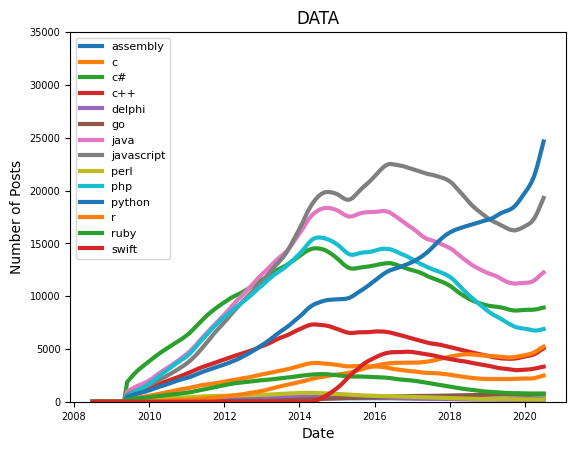

<Figure size 1600x1000 with 0 Axes>

In [ ]:
new=new.rolling(window=12).mean().fillna(0)
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("DATA")
plt.ylim(0,35000)
for column in new.columns:
  plt.plot(new.index, new[column], linewidth=3, label=new[column].name)
plt.legend(fontsize=8)
# plt.plot(new.index, new.python, color="yellow")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.figure(figsize=(16,10))

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01,12.000000,135.333333,721.000000,306.333333,39.666667,0.000000,453.000000,267.333333,53.000000,214.333333,222.000000,2.000000,121.000000,0.000000
2008-10-01,17.000000,236.333333,1383.000000,576.666667,77.000000,0.000000,837.333333,509.000000,95.333333,420.000000,392.000000,2.000000,204.000000,0.000000
2008-11-01,20.000000,294.333333,1789.333333,767.000000,119.333333,0.000000,1082.666667,648.000000,118.333333,534.333333,501.333333,2.333333,233.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,279.000000,2312.333333,8766.000000,4683.666667,175.666667,707.000000,12125.666667,18835.333333,195.333333,6638.000000,24103.333333,5189.000000,767.666667,3234.333333
2020-04-01,334.666667,2744.000000,9225.000000,5450.000000,199.666667,774.000000,13410.666667,21021.333333,217.333333,7091.666667,27405.333333,6000.000000,782.000000,3517.333333
2020-05-01,369.666667,3248.000000,9639.666667,6330.000000,217.333333,810.666667,14447.000000,23437.666667,227.666667,7549.666667,31252.000000,6547.000000,804.666667,3838.333333


In [ ]:
plt.plot()